In [2]:
#####################################################################################################
#####################################################################################################
# 3_Descriptive analyses of abstracts
#####################################################################################################
#####################################################################################################

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk # Text management
import matplotlib.pyplot as plt

In [5]:
# Launch the "import and cleaning abstracts" program
%run "C:\\Users\\....\\Program\\2_Import and cleaning abstracts.ipynb"

In [6]:
# Selection of abstracts retained at the last creaming
selection=id_excel['Selection'].values.tolist()
articles_sel=articles_vf[articles_vf.Selection == 1]
abstract_retenu=articles_sel['Abstract'].values.tolist()

abstract_tot=articles_vf['Abstract'].values.tolist()

# Creation of a unique character string which contains all the abstracts cleaned afterwards
str_abstr=''
for a in abstract_tot:
    str_abstr=str_abstr+str(a)
    
# Creation of a word list of all abstracts
liste_mot_tot=str_abstr.split()

# Similarly with the abstracts selected only
str_abstr_retenu=''
for a in abstract_retenu:
    str_abstr_retenu=str_abstr_retenu+str(a)
liste_mot_retenu=str_abstr_retenu.split()


In [7]:
# Word frequency calculation and export to Excel files

# Single word
fdtot = nltk.FreqDist(liste_mot_tot)
fdret = nltk.FreqDist(liste_mot_retenu)

# Bigram 
fd_bi_tot = nltk.FreqDist(nltk.bigrams(liste_mot_tot))
fd_bi_ret = nltk.FreqDist(nltk.bigrams(liste_mot_retenu))

# Trigram
fd_tri_tot = nltk.FreqDist(nltk.trigrams(liste_mot_tot))
fd_tri_ret = nltk.FreqDist(nltk.trigrams(liste_mot_retenu))

# Transformation of the generated list into dataframe
df_tot = pd.DataFrame.from_dict (fdtot.most_common(150))
df2_tot = pd.DataFrame.from_dict (fd_bi_tot.most_common(150))
df3_tot = pd.DataFrame.from_dict (fd_tri_tot.most_common(150))

df_ret = pd.DataFrame.from_dict (fdret.most_common(150))
df2_ret = pd.DataFrame.from_dict (fd_bi_ret.most_common(150))
df3_ret = pd.DataFrame.from_dict (fd_tri_ret.most_common(150))

with pd.ExcelWriter('freq_mots_nuage_tot.xlsx') as writer:  
    df_tot.to_excel(writer,sheet_name='mots')
    df2_tot.to_excel(writer, sheet_name='bi_gram')
    df3_tot.to_excel(writer, sheet_name='tri_gram')

with pd.ExcelWriter('freq_mots_nuage_tot_selec.xlsx') as writer:  
    df_ret.to_excel(writer,sheet_name='mots')
    df2_ret.to_excel(writer, sheet_name='bi_gram')
    df3_ret.to_excel(writer, sheet_name='tri_gram')
    

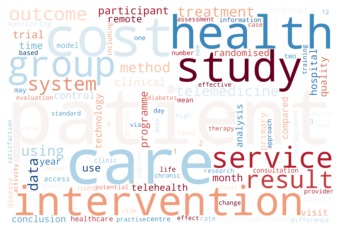

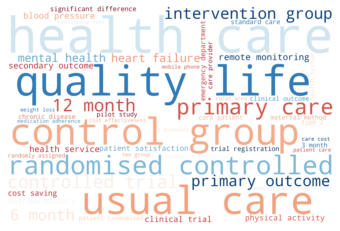

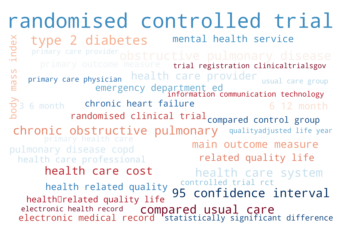

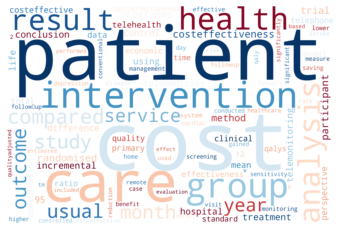

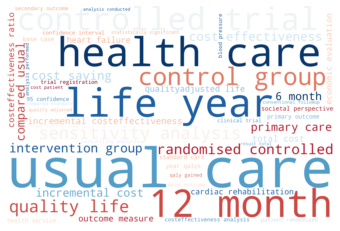

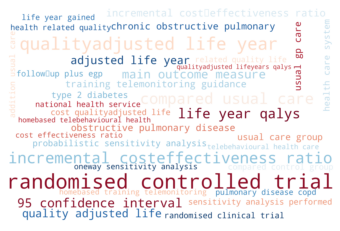

In [8]:
# Save images

# On all the abstracts
W1=wordcloud(liste_mot_tot, 100, 'RdBu')
W1.to_file("C:\\Users\\....\\Result\\nuage_tot_word.png")

W2=wordcloud_bigram(liste_mot_tot, 50, 'RdBu')
W2.to_file("C:\\Users\\....\\Result\\nuage_tot_bi.png")

W3=wordcloud_trigram(liste_mot_tot, 35, 'RdBu')
W3.to_file("C:\\Users\\....\\Result\\nuage_tot_tri.png")

# On the items selected at the last skimming
W4=wordcloud(liste_mot_retenu, 100, 'RdBu')
W4.to_file("C:\\Users\\....\\Result\\nuage_sel_word.png")

W5=wordcloud_bigram(liste_mot_retenu, 50, 'RdBu')
W5.to_file("C:\\Users\\....\\Result\\nuage_sel_bi.png")

W6=wordcloud_trigram(liste_mot_retenu, 35, 'RdBu')
W6.to_file("C:\\Users\\....\\Result\\nuage_sel_tri.png")